In [1]:
import os
from tqdm import tqdm #顯示迴圈內進度
import pandas as pd
import numpy as np #矩陣運算
import cv2
import matplotlib.pyplot as plt #視覺化
%matplotlib inline

FileNotFoundError: ignored

In [3]:
# 雲端執行須執行這行，取得權限
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.getcwd()

'/content'

In [9]:
# 雲端執行須執行這行，變更環境路徑
os.chdir("/content/drive/Shareddrives/PerryShare/2020AIGO_Course/code")
os.getcwd()

'/content/drive/Shareddrives/PerryShare/2020AIGO_Course/code'

In [10]:
data_path = "/content/drive/Shareddrives/PerryShare/2020AIGO_Course/dataset"
data_list = pd.read_csv(os.path.join(data_path, "data_list.csv"), index_col=False)
test_list = pd.read_csv(os.path.join(data_path, "test_list.csv"), index_col=False)

In [11]:
data_list.head(3)

,img_name,label
0,00000001_001.png,0
1,00000001_002.png,0
2,00000005_000.png,0


## step1-1. Image Preprocessing

In [12]:
data_path = "/content/drive/Shareddrives/PerryShare/2020AIGO_Course/dataset/data"

In [13]:
os.listdir(data_path)[:5]

['00014667_000.png',
 '00014690_000.png',
 '00015029_004.png',
 '00015321_000.png',
 '00014874_005.png']

In [15]:
img = cv2.imread(os.path.join(data_path, data_list.loc[0, "img_name"]))

image shape: (1024, 1024, 3)
data type: uint8
min: 0, max: 254


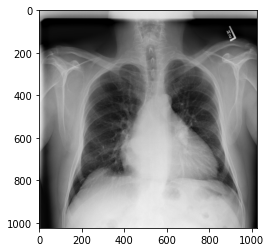

In [16]:
print(f"image shape: {img.shape}")
print(f"data type: {img.dtype}")
print(f"min: {img.min()}, max: {img.max()}")
plt.imshow(img)
plt.show()

#unsigned integer是每個位置有8bit，有0~255之間

In [17]:
health_list = data_list[data_list["label"]==0]["img_name"].values
sick_list = data_list[data_list["label"]==1]["img_name"].values

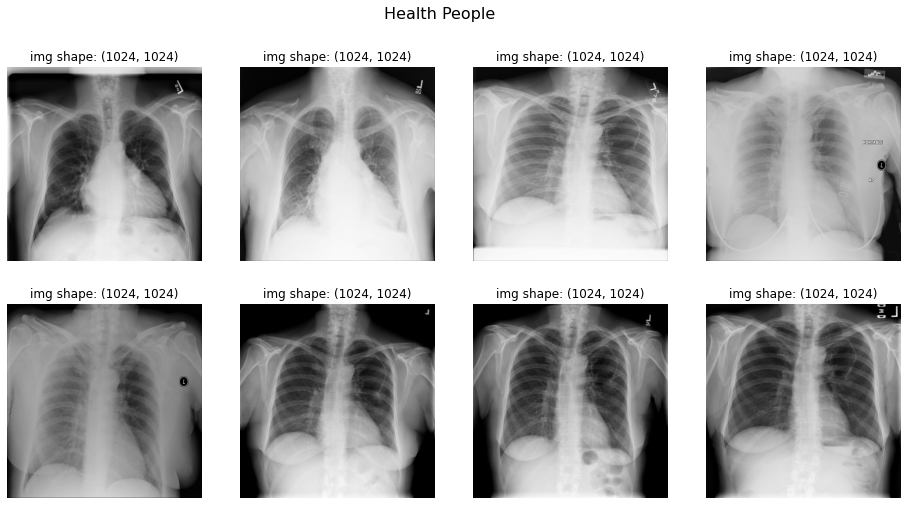

In [18]:
#正常胸腔影像
plt.figure(figsize=(16, 8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    img = cv2.imread(os.path.join(data_path, health_list[i]), 0)
    #要增加color map才能顯示正常灰階顏色
    plt.imshow(img,cmap="gray")
    plt.axis("off")
    plt.title(f"img shape: {img.shape}")
plt.suptitle(f"Health People", fontsize=16)
plt.show()

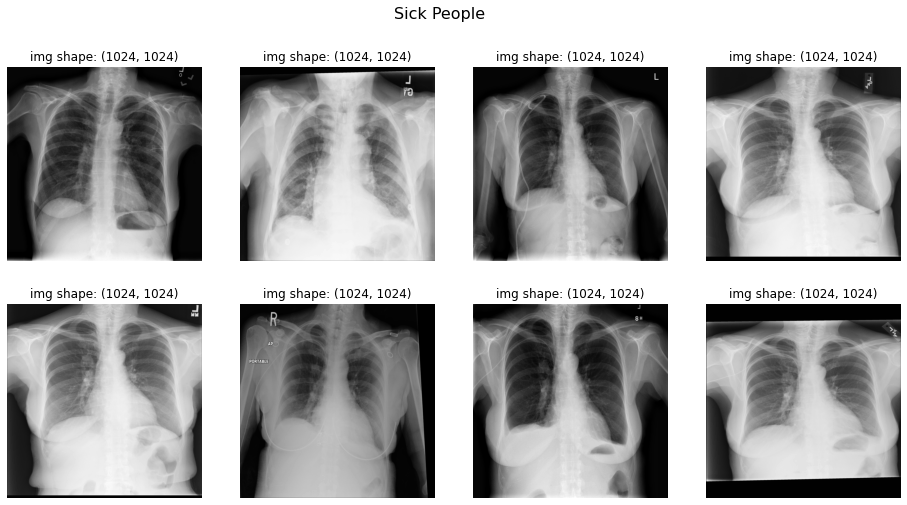

In [19]:
#病人胸腔影像
plt.figure(figsize=(16, 8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    img = cv2.imread(os.path.join(data_path, sick_list[i]), 0)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.title(f"img shape: {img.shape}")
plt.suptitle(f"Sick People", fontsize=16)
plt.show()

In [20]:
img = cv2.imread(os.path.join(data_path, sick_list[0]), 0)

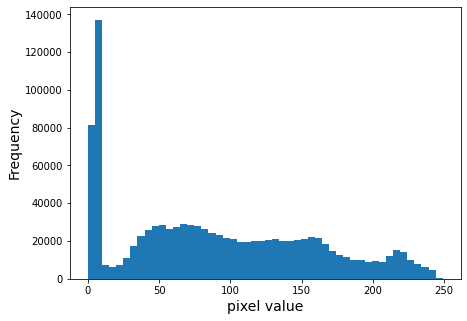

In [21]:
#將一張影像轉為色階發生的次數
plt.figure(figsize=(7, 5))
plt.hist(img.reshape(-1), bins=50)
plt.xlabel("pixel value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

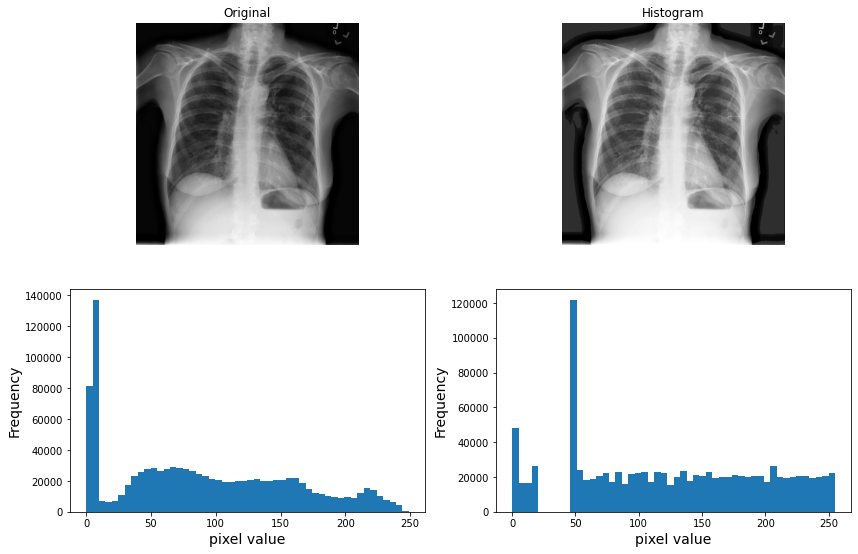

In [22]:
#equalizeHist function要輸入灰階影像，將色階的頻率做smoothing
equalize_img = cv2.equalizeHist(img)

plt.figure(figsize=(14, 9))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title(f"Original")

plt.subplot(2, 2, 2)
plt.imshow(equalize_img, cmap="gray")
plt.axis("off")
plt.title(f"Histogram")

plt.subplot(2, 2, 3)
plt.hist(img.reshape(-1), bins=50)
plt.xlabel("pixel value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.subplot(2, 2, 4)
plt.hist(equalize_img.reshape(-1), bins=50)
plt.xlabel("pixel value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()
#經histogram equalization(右圖)，讓頻率較smoothing，全域可提提高對比度，但可能會增加噪音
#建議使用Adaptive histogram equalization

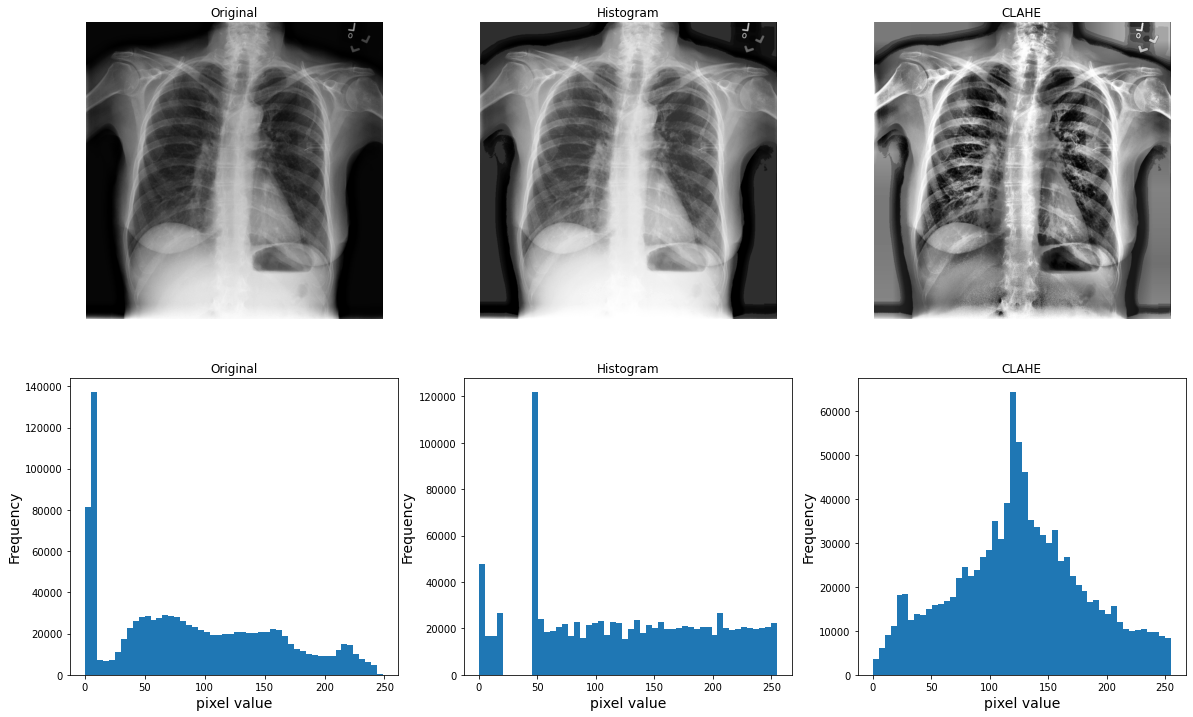

In [23]:
#使用adaptive histogram equalization，要輸入灰階影像
clahe = cv2.createCLAHE()
clahe_img = clahe.apply(img)

plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title(f"Original")

plt.subplot(2, 3, 2)
plt.imshow(equalize_img, cmap="gray")
plt.axis("off")
plt.title(f"Histogram")

plt.subplot(2, 3, 3)
plt.imshow(clahe_img, cmap="gray")
plt.axis("off")
plt.title(f"CLAHE")

plt.subplot(2, 3, 4)
plt.hist(img.reshape(-1), bins=50)
plt.xlabel("pixel value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title(f"Original")

plt.subplot(2, 3, 5)
plt.hist(equalize_img.reshape(-1), bins=50)
plt.xlabel("pixel value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title(f"Histogram")

plt.subplot(2, 3, 6)
plt.hist(clahe_img.reshape(-1), bins=50)
plt.xlabel("pixel value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title(f"CLAHE")
plt.show()
#經adaptive(右圖)，相較於histogram(中圖)，更針對區塊對比度提高

In [24]:
#參數(路徑，resize大小)
def img_preprocess(filepath, img_shape=(800, 800), clahe_or_not=True, crop_shape=None):
    img = cv2.imread(filepath, 0)
    h, w = img.shape[0], img.shape[1]
    ch, cw = h//2, w//2
    
    if crop_shape!=None:
        l_h, l_w = crop_shape[0]//2, crop_shape[1]//2
        img = img[ch-l_h:ch+l_h, cw-l_w:cw+l_w]
        
    if clahe_or_not:
        clahe = cv2.createCLAHE()
        clahe_img = clahe.apply(img)
        img = clahe_img
    
    if (img.shape[0], img.shape[1])!= img_shape:
        img = cv2.resize(img, img_shape)
    
    return img

In [26]:
preprocess_path = "/content/drive/Shareddrives/PerryShare/2020AIGO_Course/dataset/data_crop_clahe"
if not os.path.exists(preprocess_path):
    os.makedirs(preprocess_path)

In [28]:
#這邊是training set
#crop掉周圍的雜物
#tqdm()顯示迴圈的進度條
for each_file in tqdm(data_list["img_name"].values):
    old_path = os.path.join(data_path, each_file)
    img = img_preprocess(old_path, 
                img_shape=(800, 800),
                clahe_or_not=True,
                crop_shape=(850, 850))
    new_path = preprocess_path
    cv2.imwrite(os.path.join(new_path, each_file), img)

100%|██████████| 2619/2619 [19:36<00:00,  2.23it/s]


In [29]:
#這邊是testing set
for each_file in tqdm(test_list["img_name"].values):
    old_path = os.path.join(data_path, each_file)
    img = img_preprocess(old_path, 
                         img_shape=(800, 800),
                         clahe_or_not=True,
                         crop_shape=(850, 850))
    new_path = preprocess_path
    cv2.imwrite(os.path.join(new_path, each_file), img)

100%|██████████| 1162/1162 [09:09<00:00,  2.11it/s]


## step1-2. 資料切分

In [30]:
#training有2619筆，testing有1162筆
data_list.shape, test_list.shape

((2619, 2), (1162, 2))

In [31]:
#training label 0代表健康，1代表生病
data_list["label"].value_counts()

0    1696
1     923
Name: label, dtype: int64

In [32]:
#testing label 
test_list["label"].value_counts()

0    720
1    442
Name: label, dtype: int64

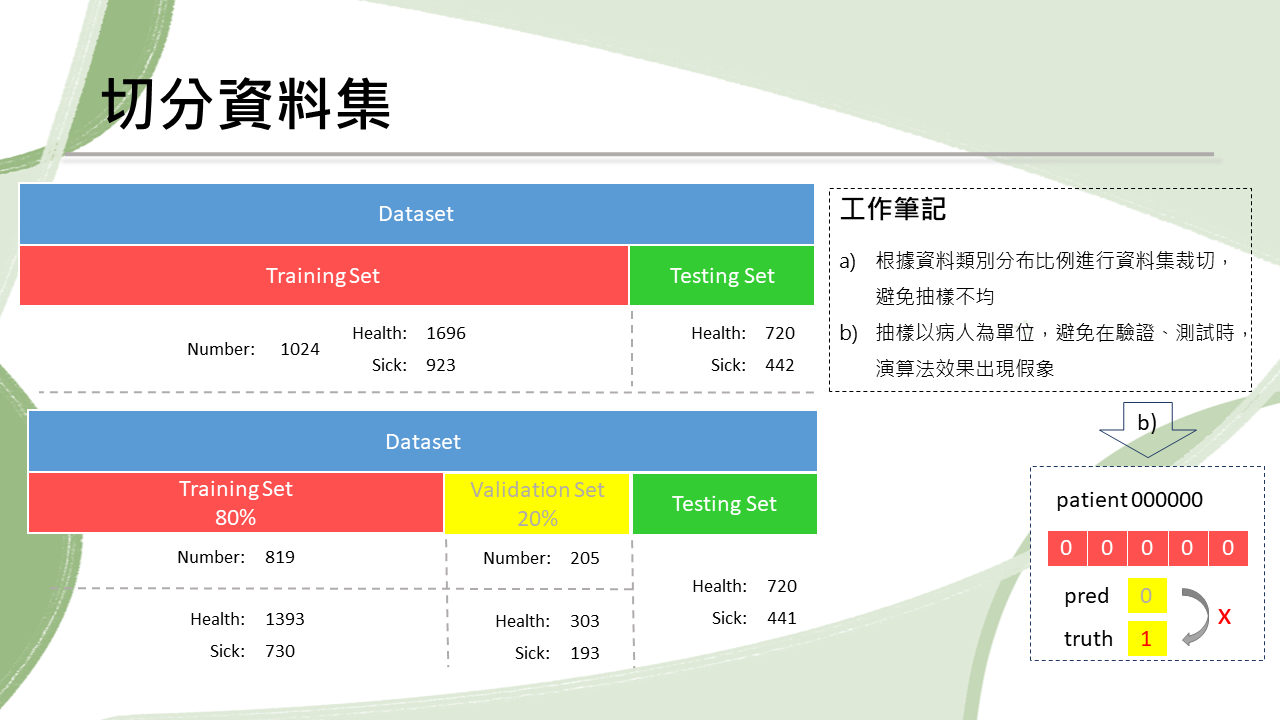

In [ ]:
# 以病人為單位 將training set切20%成為validation set
# 因一個病人會有好幾張影像，會發生上圖右下情況

In [33]:
data_list["img_name"].head()

0    00000001_001.png
1    00000001_002.png
2    00000005_000.png
3    00000005_001.png
4    00000005_002.png
Name: img_name, dtype: object

In [34]:
data_list["patient id"] = data_list["img_name"].apply(lambda x: x.split("_")[0])

In [35]:
#shape查看有幾筆資料
data_list["patient id"].unique().shape

(1024,)

In [36]:
data_id = data_list["patient id"].unique().squeeze()

In [37]:
#使用sklearn.model_selection來切分資料
from sklearn.model_selection import train_test_split

In [38]:
# 將id_train切出20% id_valid，random_state是固定抽樣從哪，避免每次都不一樣
id_train, id_valid = train_test_split(data_id,
                                      test_size=0.2,
                                      random_state=5)

In [39]:
#切出train 有819筆，valid 有205筆
id_train.shape, id_valid.shape

((819,), (205,))

In [40]:
data_list["types"] = data_list["patient id"].apply(lambda x: "train" if x in id_train else "valid")

In [41]:
train_list = data_list[data_list["types"]=="train"][['img_name', 'label', 'patient id']]
valid_list = data_list[data_list["types"]=="valid"][['img_name', 'label', 'patient id']]

In [42]:
train_list["patient id"].unique().shape, valid_list["patient id"].unique().shape

((819,), (205,))

In [43]:
# label比例為2:1
train_list["label"].value_counts()

0    1393
1     730
Name: label, dtype: int64

In [44]:
# label比例為2:1
valid_list["label"].value_counts()

0    303
1    193
Name: label, dtype: int64

In [45]:
#說明:00000005有7張健康，1張生病
#跟前面說到要以病人做資料分割就是避免同一個病人有兩種情況
train_list.groupby(["patient id", "label"]).size()[:20]

patient id  label
00000001    0        2
00000005    0        7
            1        1
00000011    0        2
            1        1
00000039    0        5
00000040    0        2
00000042    0        9
00000046    0        1
00000054    0        2
00000056    0        1
00000062    0        1
00000083    0        1
00000087    0        2
00000094    0        1
00000097    0        1
00000106    0        1
00000118    0        7
00000119    0        1
00000124    0        1
dtype: int64

In [46]:
valid_list.groupby(["patient id", "label"]).size()[:20]

patient id  label
00000036    0        1
00000068    0        1
00000071    0        2
            1        6
00000165    0        9
00000199    0        5
00000223    0        1
00000227    0        2
00000230    0        8
00000437    0        1
00000451    0        1
00000454    0        1
00000540    0        2
00000606    0        1
00000704    0        4
00000776    0        1
00000780    0        1
00000879    0        1
00000944    0        2
00000977    0        1
dtype: int64

In [49]:
list_path = "/content/drive/Shareddrives/PerryShare/2020AIGO_Course/code/data_list"
if not os.path.exists(list_path):
    os.makedirs(list_path)

In [50]:
#將執行過後的資料，存回雲端資料夾，避免每次跑都切到不一樣的train/test
#/content/drive/Shareddrives/PerryShare/2020AIGO_Course/data_list
train_list.to_csv(os.path.join(list_path, "train_list.csv"), index=False)
valid_list.to_csv(os.path.join(list_path, "valid_list.csv"), index=False)
test_list.to_csv(os.path.join(list_path, "test_list.csv"), index=False)